<a href="https://colab.research.google.com/github/keshav434/Loan-Application-Data-Analysis/blob/main/titanic_ml_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib_inline as plt
upload = files.upload()
import matplotlib.pyplot
import seaborn


Saving train.csv to train (7).csv


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df =pd.read_csv("train.csv")
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Checking for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df = df.drop(['Ticket', 'Fare', 'Name','PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [ ]:
# Drop rows where the 'Embarked' column has missing values
df = df.dropna(subset=['Embarked'])

# Display the first few rows of the updated DataFrame to confirm the changes
print(df.head())

# Optionally, you can also check if there are any more missing values
print(df.isnull().sum())

   Survived  Pclass     Sex   Age  SibSp  Parch Cabin Embarked
0         0       3    male  22.0      1      0   NaN        S
1         1       1  female  38.0      1      0   C85        C
2         1       3  female  26.0      0      0   NaN        S
3         1       1  female  35.0      1      0  C123        S
4         0       3    male  35.0      0      0   NaN        S
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      0
dtype: int64


In [ ]:
df.shape

(889, 8)

In [ ]:
df = df.drop('Cabin', axis=1)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


<ipython-input-21-2e05ce84198b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=df, palette='viridis')


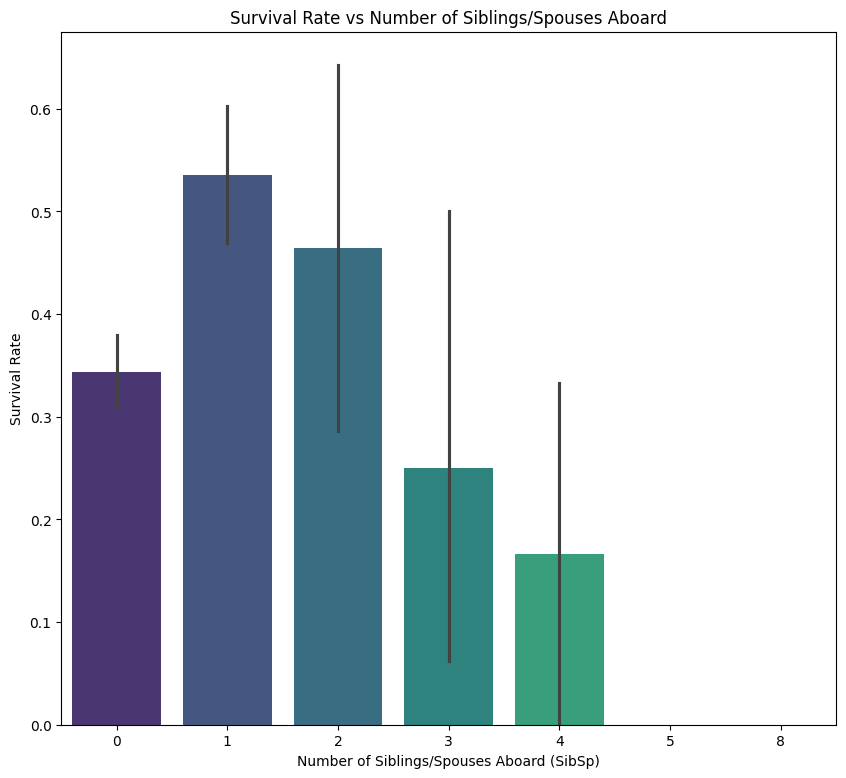

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Create a bar plot
plt.figure(figsize=(10, 9))
sns.barplot(x='SibSp', y='Survived', data=df, palette='viridis')

# Customizing the plot
plt.title('Survival Rate vs Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

<ipython-input-23-c718f845c292>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=df, palette='viridis')


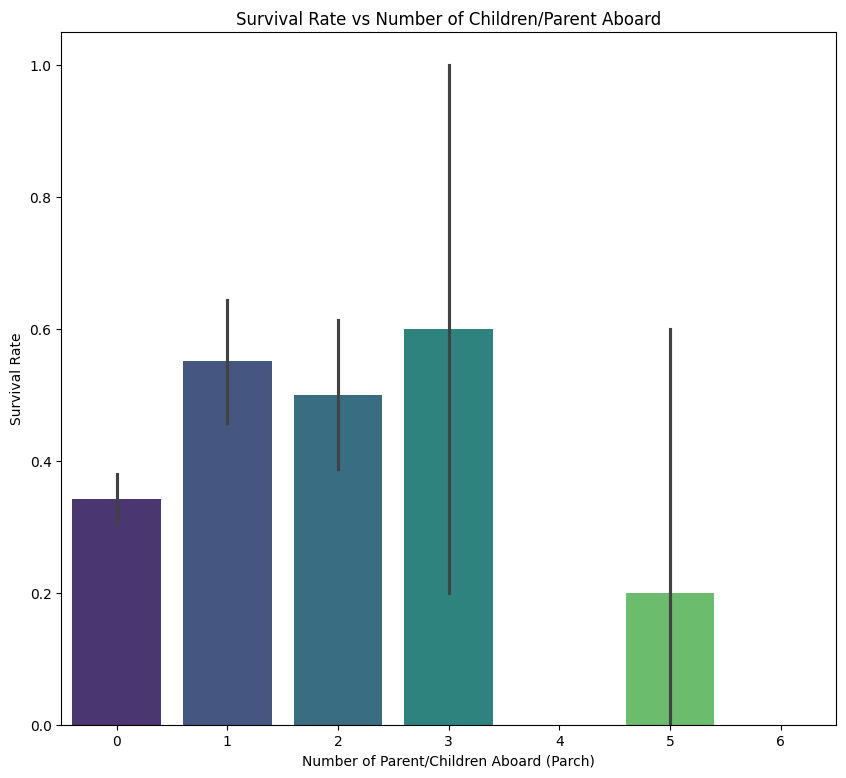

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 9))
sns.barplot(x='Parch', y='Survived', data=df, palette='viridis')

# Customizing the plot
plt.title('Survival Rate vs Number of Children/Parent Aboard')
plt.xlabel('Number of Parent/Children Aboard (Parch)')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

<ipython-input-24-e7f33d7c61d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Survived', y='Age', jitter=True, palette='viridis', alpha=0.6)


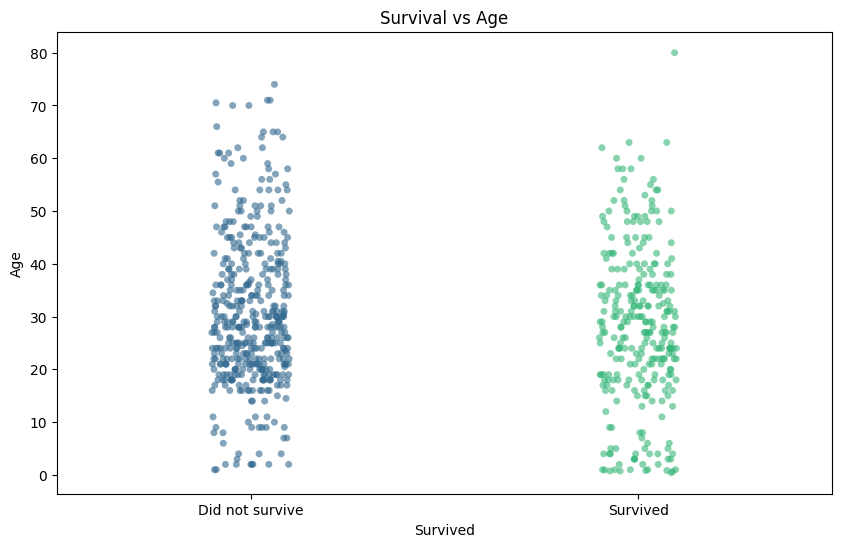

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Survived', y='Age', jitter=True, palette='viridis', alpha=0.6)

# Customizing the plot
plt.title('Survival vs Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did not survive', 'Survived'])

# Show the plot
plt.show()

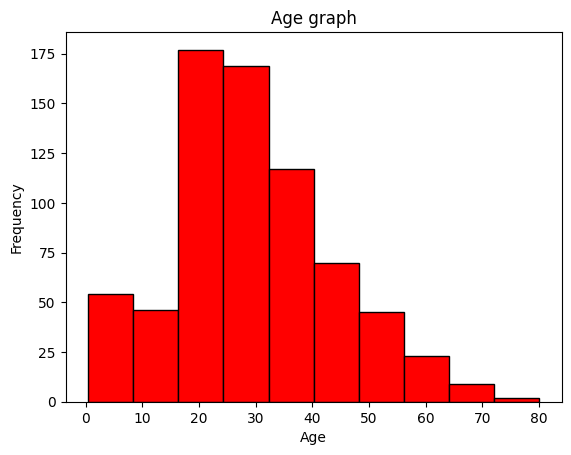

In [ ]:
# AGE GRAPH
import matplotlib.pyplot as plt
plt.figsize=(20,20)
plt.hist(df["Age"], color="red", edgecolor="black")
plt.title("Age graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [ ]:
def CattoNum(gender):
    if gender == 'male':
        return 1
    else:
        return 0

df['Sex_table'] = df['Sex'].apply(CattoNum)
df

KeyError: 'Sex'

In [ ]:

df =df.drop('Sex', axis=1)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_table
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,0
2,1,3,26.0,0,0,S,0
3,1,1,35.0,1,0,S,0
4,0,3,35.0,0,0,S,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,1
887,1,1,19.0,0,0,S,0
888,0,3,NaN,1,2,S,0
889,1,1,26.0,0,0,C,1


In [ ]:
encoder = OneHotEncoder(sparse=False, drop=None)  # Don't drop any category
encoded_features = encoder.fit_transform(df[['Pclass','SibSp','Parch','Embarked']])

# Convert to DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Pclass','SibSp','Parch','Embarked']))

# Concatenate with original DataFrame (excluding the original Pclass column)
df_encoded = pd.concat([df.drop('Pclass', axis=1), encoded_features_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded = pd.concat([df.drop('Parch', axis=1), encoded_features_df], axis=1)
df_encoded = pd.concat([df.drop('SibSp', axis=1), encoded_features_df], axis=1)
df_encoded = pd.concat([df.drop('Embarked', axis=1), encoded_features_df], axis=1)

In [ ]:
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0.0,3.0,NaN,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1.0,1.0,26.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
890,0.0,3.0,32.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded.isnull().sum()

,0
Survived,2
Pclass,2
Age,179
SibSp,2
Parch,2
Sex_table,2
Pclass_1,2
Pclass_2,2
Pclass_3,2
SibSp_0,2


In [ ]:
print(df_encoded.columns)


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_table', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [ ]:
# Drop rows with missing values in specific columns
df_cleaned = df_encoded.dropna(subset=['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex_table', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'])



In [ ]:
df_cleaned

,Survived,Pclass,Age,SibSp,Parch,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.0,3.0,39.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,0.0,2.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_cleaned.isnull().sum()

,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Sex_table,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
SibSp_0,0


In [ ]:
df1=df_cleaned.drop(['Pclass', 'SibSp', 'Parch'], axis=1)

In [ ]:
df_cleaned

,Survived,Pclass,Age,SibSp,Parch,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.0,3.0,39.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,0.0,2.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df1.isnull().sum()

,0
Survived,0
Age,177
Sex_table,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
SibSp_0,0
SibSp_1,0
SibSp_2,0
SibSp_3,0


In [ ]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df1.isnull().sum()

,0
Survived,0
Age,0
Sex_table,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
SibSp_0,0
SibSp_1,0
SibSp_2,0
SibSp_3,0


In [ ]:
df1

,Survived,Age,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,38.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,26.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,35.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,25.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.0,39.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,0.0,27.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,19.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


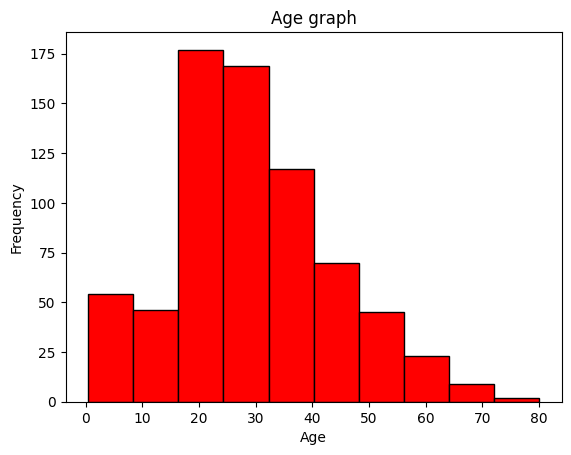

In [ ]:
# AGE GRAPH
import matplotlib.pyplot as plt
plt.figsize=(20,20)
plt.hist(df["Age"], color="red", edgecolor="black")
plt.title("Age graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_age = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')

df1['Age bin']= kbin_age.fit_transform(df1['Age'].values.reshape(-1,1)).astype(int)
print(pd.concat([df1['Age'], df1['Age bin']], axis=1))
bin_edges = kbin_age.bin_edges_[0]
print("Bin Edges:", bin_edges)
df1

           Age  Age bin
0    22.000000        1
1    38.000000        3
2    26.000000        2
3    35.000000        3
4    35.000000        3
..         ...      ...
884  25.000000        2
885  39.000000        3
886  27.000000        2
887  19.000000        1
888  29.643901        2

[887 rows x 2 columns]
Bin Edges: [ 0.42       11.78857143 23.15714286 34.52571429 45.89428571 57.26285714
 68.63142857 80.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,Survived,Age,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Age bin
0,0.0,22.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.0,38.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,1.0,26.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,1.0,35.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,0.0,35.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,25.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
885,0.0,39.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
886,0.0,27.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
887,1.0,19.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


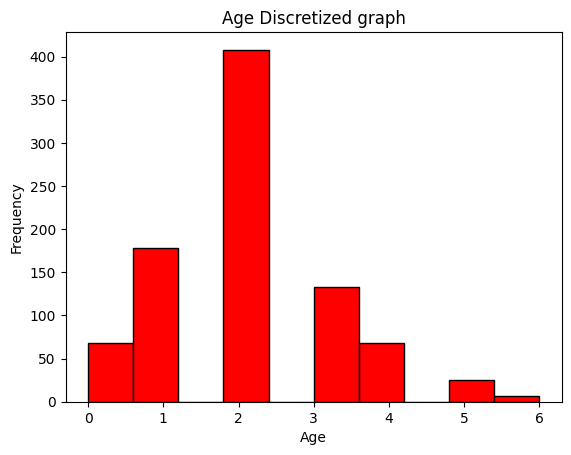

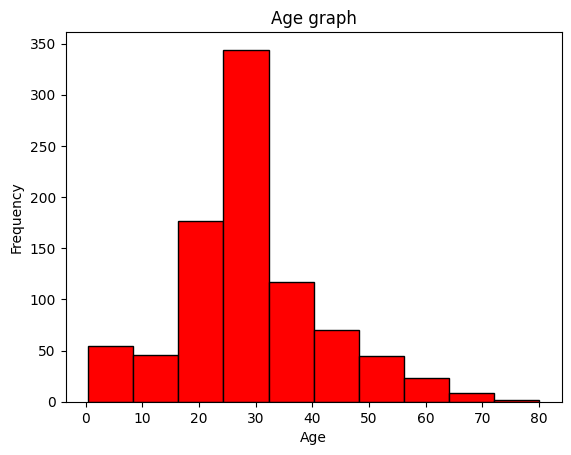

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df1["Age bin"], color="red", edgecolor="black")
plt.title("Age Discretized graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
plt.hist(df1["Age"], color="red", edgecolor="black")
plt.title("Age graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df1

,Survived,Age,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Age bin
0,0.0,22.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.0,38.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,1.0,26.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,1.0,35.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,0.0,35.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,25.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
885,0.0,39.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
886,0.0,27.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
887,1.0,19.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
df2=df1.drop(['Age'], axis=1)

In [ ]:
df2.isnull().sum()

,0
Survived,0
Sex_table,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
SibSp_0,0
SibSp_1,0
SibSp_2,0
SibSp_3,0
SibSp_4,0


In [ ]:

# Fit and transform the data
encoded_features = encoder.fit_transform(df2[['Age bin']])

# Convert to DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Age bin']))

# Concatenate with the original DataFrame (excluding the original columns)
df3 = pd.concat([df2.drop(['Age bin'], axis=1), encoded_features_df], axis=1)

# Display the resulting DataFrame
print(df3)

     Survived  Sex_table  Pclass_1  Pclass_2  Pclass_3  SibSp_0  SibSp_1  \
0         0.0        1.0       0.0       0.0       1.0      0.0      1.0   
1         1.0        0.0       1.0       0.0       0.0      0.0      1.0   
2         1.0        0.0       0.0       0.0       1.0      1.0      0.0   
3         1.0        0.0       1.0       0.0       0.0      0.0      1.0   
4         0.0        1.0       0.0       0.0       1.0      1.0      0.0   
..        ...        ...       ...       ...       ...      ...      ...   
886       0.0        1.0       0.0       0.0       1.0      0.0      1.0   
887       1.0        0.0       1.0       0.0       0.0      1.0      0.0   
888       0.0        0.0       0.0       0.0       1.0      1.0      0.0   
61        NaN        NaN       NaN       NaN       NaN      NaN      NaN   
829       NaN        NaN       NaN       NaN       NaN      NaN      NaN   

     SibSp_2  SibSp_3  SibSp_4  ...  Embarked_C  Embarked_Q  Embarked_S  \
0        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df3

,Survived,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Embarked_C,Embarked_Q,Embarked_S,Age bin_0,Age bin_1,Age bin_2,Age bin_3,Age bin_4,Age bin_5,Age bin_6
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df3.isnull().sum()

,0
Survived,2
Sex_table,2
Pclass_1,2
Pclass_2,2
Pclass_3,2
SibSp_0,2
SibSp_1,2
SibSp_2,2
SibSp_3,2
SibSp_4,2


In [ ]:
print(df3.columns)

Index(['Survived', 'Sex_table', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age bin_0',
       'Age bin_1', 'Age bin_2', 'Age bin_3', 'Age bin_4', 'Age bin_5',
       'Age bin_6'],
      dtype='object')


In [ ]:
df4 = df3.dropna(subset=['Survived', 'Sex_table', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age bin_0',
       'Age bin_1', 'Age bin_2', 'Age bin_3', 'Age bin_4', 'Age bin_5',
       'Age bin_6'])

In [ ]:
df5=df4.drop(['Age bin_0'], axis=1)

In [ ]:
df5.isnull().sum()

,0
Survived,0
Sex_table,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
SibSp_0,0
SibSp_1,0
SibSp_2,0
SibSp_3,0
SibSp_4,0


In [ ]:
df5

,Survived,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Age bin_1,Age bin_2,Age bin_3,Age bin_4,Age bin_5,Age bin_6
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
883,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
884,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
885,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df5.describe()

,Survived,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Age bin_1,Age bin_2,Age bin_3,Age bin_4,Age bin_5,Age bin_6
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.381921,0.649718,0.239548,0.206780,0.553672,0.682486,0.233898,0.031638,0.018079,0.020339,...,0.001130,0.188701,0.085876,0.725424,0.201130,0.461017,0.149153,0.076836,0.028249,0.007910
std,0.486132,0.477328,0.427049,0.405225,0.497392,0.465773,0.423548,0.175134,0.133313,0.141237,...,0.033615,0.391492,0.280339,0.446553,0.401072,0.498760,0.356440,0.266482,0.165776,0.088634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df5.columns)

Index(['Survived', 'Sex_table', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age bin_1',
       'Age bin_2', 'Age bin_3', 'Age bin_4', 'Age bin_5', 'Age bin_6'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X=df5[[ 'Sex_table', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age bin_1',
       'Age bin_2', 'Age bin_3', 'Age bin_4', 'Age bin_5', 'Age bin_6']]
y=df5['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
y_train

,Survived
405,0.0
435,1.0
361,0.0
356,1.0
82,1.0
...,...
107,1.0
271,1.0
862,1.0
436,0.0


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

parameter={
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'min_samples_split': [2, 3, 4, 8, 12],
    'min_samples_leaf': [1, 2, 4, 6, 7, 8,9,10,11,12,13,14]
}

grid_search = GridSearchCV(DT_model, parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Best hyperparameters
best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

bscore1=grid_search.best_score_
print("Best score:", bscore1)
cve=1-bscore1
print("Cross validation error",cve)

# Fit the model with the best hyperparameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7895215263210469
Cross validation error 0.21047847367895312


DecisionTreeClassifier(max_depth=1)

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbmodel=GaussianNB()

parameter ={
    'priors' :[None],
    'var_smoothing': [0.3,0.4,0.5,0.6,1,2,]
}

grid_search = GridSearchCV(nbmodel, parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

bscore2=grid_search.best_score_
print("Best score:", bscore2)
cve=1-bscore2
print("Cross validation error",cve)

final_nb_model = grid_search.best_estimator_
final_nb_model.fit(X_train, y_train)

Best Hyperparameters: {'priors': None, 'var_smoothing': 0.4}
Best score: 0.7810508440715213
Cross validation error 0.21894915592847874


GaussianNB(var_smoothing=0.4)

# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

parameter = {
    'C': [0.05,0.1,0.3, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_model, parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

bscore3=grid_search.best_score_
print("Best score:", bscore3)
cve=1-bscore3
print("Cross Validation error",cve)

final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)


Best Hyperparameters: {'C': 0.05, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.7895215263210469
Cross Validation error 0.21047847367895312


SVC(C=0.05, kernel='linear')

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()

parameter = {
'hidden_layer_sizes': [(150,100,50)],
'max_iter': [300],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
}

grid_search = GridSearchCV(mlp_model, parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Best hyperparameters
best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

bscore4=grid_search.best_score_
print("Best score:", bscore4)
cve=1-bscore4
print("Cross Validation error",cve)

# Fit the model with the best hyperparameters
best_mlp_model = grid_search.best_estimator_
best_mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 300, 'solver': 'sgd'}
Best score: 0.7852662071721107
Cross Validation error 0.2147337928278893


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, solver='sgd')

# **Random Forest (Ensemble method)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()

parameter = {
    'n_estimators': [100,150,180,190,200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(rf_model, parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

bscore5=grid_search.best_score_
print("Best score:", bscore5)
cve=1-bscore5
print("Cross Validation error",cve)

# Train the final model with the best hyperparameters
best_random_forest_model = grid_search.best_estimator_
best_random_forest_model.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Best score: 0.7598641494356209
Cross Validation error 0.24013585056437914


RandomForestClassifier(max_depth=10, n_estimators=200)

# **Gradient Boosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
parameter = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Setup the GridSearchCV with cross-validation
grid_search = GridSearchCV(gb_model, parameter, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

# Get the best score from the grid search
bscore6 = grid_search.best_score_
print("Best score:", bscore6)

# Calculate the cross-validation error
cve = 1 - bscore6
print("Cross Validation error:", cve)

# Train the final model with the best hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.7867046249125962
Cross Validation error: 0.21329537508740382


GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
parameter = {
    'n_neighbors': [3, 5, 7, 9, 11],          # Number of neighbors to use
    'weights': ['uniform', 'distance'],       # Weight function used in prediction
    'p': [1, 2]                              # Power parameter for the Minkowski distance
}

# Setup the GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_model, parameter, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

# Get the best score from the grid search
bscore7 = grid_search.best_score_
print("Best score:", bscore7)

# Calculate the cross-validation error
cve = 1 - bscore7
print("Cross Validation error:", cve)

# Train the final model with the best hyperparameters
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best score: 0.723064628908201
Cross Validation error: 0.276935371091799


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
upload = files.upload()

Saving test.csv to test (4).csv


In [ ]:
test =pd.read_csv("test.csv")
print(test.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test = test.drop(['PassengerId','Ticket', 'Fare', 'Name', 'Cabin'], axis=1)
test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.0,0,0,C
415,3,male,38.5,0,0,S
416,3,male,NaN,0,0,S


In [ ]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Embarked,0


In [ ]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [ ]:
def CattoNum(gender):
    if gender == 'male':
        return 1
    else:
        return 0

test['Sex_table'] = test['Sex'].apply(CattoNum)
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex_table
0,3,male,34.50000,0,0,Q,1
1,3,female,47.00000,1,0,S,0
2,2,male,62.00000,0,0,Q,1
3,3,male,27.00000,0,0,S,1
4,3,female,22.00000,1,1,S,0
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,S,1
414,1,female,39.00000,0,0,C,0
415,3,male,38.50000,0,0,S,1
416,3,male,30.27259,0,0,S,1


In [ ]:

from sklearn.preprocessing import KBinsDiscretizer

kbin_age = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')

test['Age bin']= kbin_age.fit_transform(test['Age'].values.reshape(-1,1)).astype(int)
print(pd.concat([test['Age'], test['Age bin']], axis=1))
bin_edges = kbin_age.bin_edges_[0]
print("Bin Edges:", bin_edges)
test

          Age  Age bin
0    34.50000        3
1    47.00000        4
2    62.00000        5
3    27.00000        2
4    22.00000        2
..        ...      ...
413  30.27259        2
414  39.00000        3
415  38.50000        3
416  30.27259        2
417  30.27259        2

[418 rows x 2 columns]
Bin Edges: [ 0.17       11.00285714 21.83571429 32.66857143 43.50142857 54.33428571
 65.16714286 76.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex_table,Age bin
0,3,male,34.50000,0,0,Q,1,3
1,3,female,47.00000,1,0,S,0,4
2,2,male,62.00000,0,0,Q,1,5
3,3,male,27.00000,0,0,S,1,2
4,3,female,22.00000,1,1,S,0,2
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,S,1,2
414,1,female,39.00000,0,0,C,0,3
415,3,male,38.50000,0,0,S,1,3
416,3,male,30.27259,0,0,S,1,2


In [ ]:
test=test.drop(['Age'], axis=1)

In [ ]:
test =test.drop('Sex', axis=1)

In [ ]:
test

,Pclass,SibSp,Parch,Embarked,Sex_table,Age bin
0,3,0,0,Q,1,3
1,3,1,0,S,0,4
2,2,0,0,Q,1,5
3,3,0,0,S,1,2
4,3,1,1,S,0,2
...,...,...,...,...,...,...
413,3,0,0,S,1,2
414,1,0,0,C,0,3
415,3,0,0,S,1,3
416,3,0,0,S,1,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None)

# Fit and transform the data
encoded_features = encoder.fit_transform(test[['Pclass', 'SibSp', 'Parch', 'Embarked','Age bin']])

# Convert to DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Pclass', 'SibSp', 'Parch', 'Embarked','Age bin']))

# Concatenate with original DataFrame (excluding the original columns)
test_encoded = pd.concat([test.drop(['Pclass', 'SibSp', 'Parch', 'Embarked','Age bin'], axis=1), encoded_features_df], axis=1)

# Display the resulting DataFrame
print(test_encoded.head())


   Sex_table  Pclass_1  Pclass_2  Pclass_3  SibSp_0  SibSp_1  SibSp_2  \
0          1       0.0       0.0       1.0      1.0      0.0      0.0   
1          0       0.0       0.0       1.0      0.0      1.0      0.0   
2          1       0.0       1.0       0.0      1.0      0.0      0.0   
3          1       0.0       0.0       1.0      1.0      0.0      0.0   
4          0       0.0       0.0       1.0      0.0      1.0      0.0   

   SibSp_3  SibSp_4  SibSp_5  ...  Embarked_C  Embarked_Q  Embarked_S  \
0      0.0      0.0      0.0  ...         0.0         1.0         0.0   
1      0.0      0.0      0.0  ...         0.0         0.0         1.0   
2      0.0      0.0      0.0  ...         0.0         1.0         0.0   
3      0.0      0.0      0.0  ...         0.0         0.0         1.0   
4      0.0      0.0      0.0  ...         0.0         0.0         1.0   

   Age bin_0  Age bin_1  Age bin_2  Age bin_3  Age bin_4  Age bin_5  Age bin_6  
0        0.0        0.0        0.0       

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
test_encoded

,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Embarked_C,Embarked_Q,Embarked_S,Age bin_0,Age bin_1,Age bin_2,Age bin_3,Age bin_4,Age bin_5,Age bin_6
0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
414,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
416,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
test_encoded=test_encoded.drop(['Age bin_0'], axis=1)

In [ ]:
test_encoded

,Sex_table,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Parch_9,Embarked_C,Embarked_Q,Embarked_S,Age bin_1,Age bin_2,Age bin_3,Age bin_4,Age bin_5,Age bin_6
0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
414,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
416,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
test_encoded=test_encoded.drop(['Parch_9'], axis=1)

In [ ]:
# Predict on the test data
predictions1 = best_dt_model.predict(test_encoded)

# Print predictions
print("Predictions on the test data:", predictions1)

Predictions on the test data: [0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0.

In [ ]:
# Predict on the test data
predictions2 = final_nb_model.predict(test_encoded)

# Print predictions
print("Predictions on Naive Bayes the test data:", predictions2)

Predictions on Naive Bayes the test data: [0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1.

In [ ]:
# Predict on the test data
predictions3 = final_model.predict(test_encoded)

# Print predictions
print("Predictions on SVM the test data:", predictions3)

Predictions on SVM the test data: [0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0

In [ ]:
# Predict on the test data
predictions4 = best_mlp_model.predict(test_encoded)

# Print predictions
print("Predictions on MLP the test data:", predictions4)

Predictions on MLP the test data: [0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0

In [ ]:
# Predict on the test data
predictions5 = best_random_forest_model.predict(test_encoded)

# Print predictions
print("Predictions on Random Forest the test data:", predictions5)

Predictions on Random Forest the test data: [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 

In [ ]:
# Predict on the test data
predictions6 = best_gb_model.predict(test_encoded)

# Print predictions
print("Predictions on Gradient Boosting Model the test data:", predictions6)

Predictions on Gradient Boosting Model the test data: [0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 

In [ ]:
# Predict on the test data
predictions7 = best_knn_model.predict(test_encoded)

# Print predictions
print("Predictions on KNN the test data:", predictions7)

Predictions on KNN the test data: [0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0

In [ ]:
upload = files.upload()

Saving gender_submission.csv to gender_submission (3).csv


In [ ]:
actualdata =pd.read_csv("gender_submission.csv")
print(actualdata.dtypes)

PassengerId    int64
Survived       int64
dtype: object


In [ ]:
actualdata

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


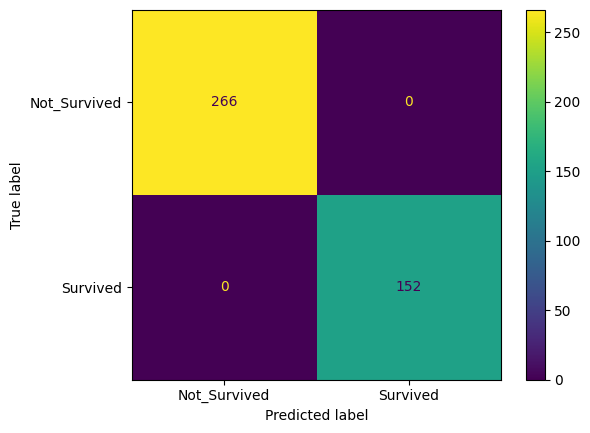

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `actualdata['Survived']` contains the true labels
# and `predictions1` contains the predicted labels from your model

# Compute the confusion matrix
matrixDT = confusion_matrix(actualdata['Survived'], predictions1)

# Create a ConfusionMatrixDisplay object
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT, display_labels=['Not_Survived', 'Survived'])

# Plot the confusion matrix
matrixDT_display.plot()


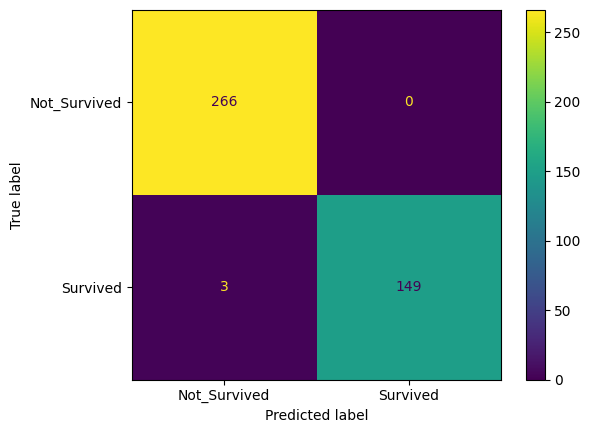

In [ ]:
matrixDT = confusion_matrix(actualdata['Survived'],predictions2)
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT,display_labels=['Not_Survived','Survived'])
matrixDT_display.plot()

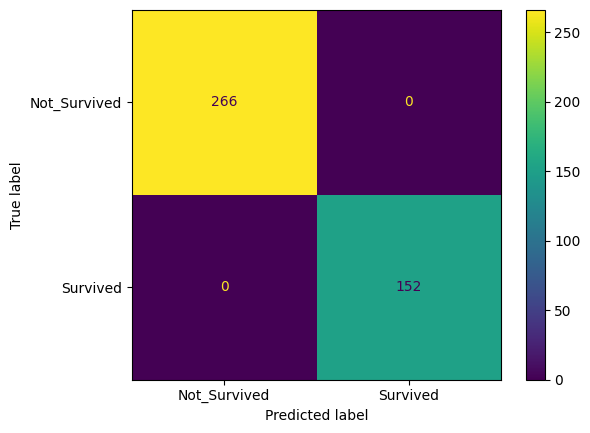

In [ ]:
matrixDT = confusion_matrix(actualdata['Survived'],predictions3)
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT,display_labels=['Not_Survived','Survived'])
matrixDT_display.plot()

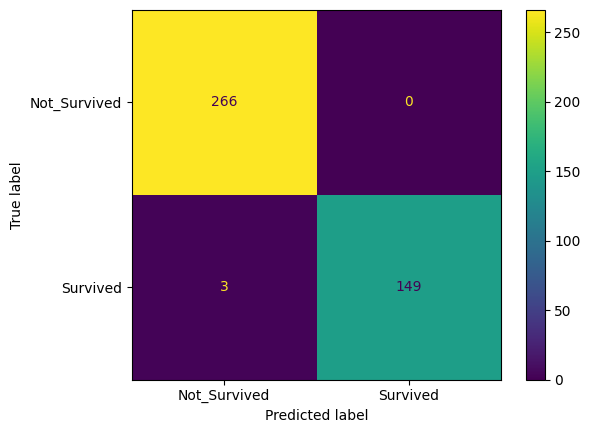

In [ ]:
matrixDT = confusion_matrix(actualdata['Survived'],predictions4)
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT,display_labels=['Not_Survived','Survived'])
matrixDT_display.plot()

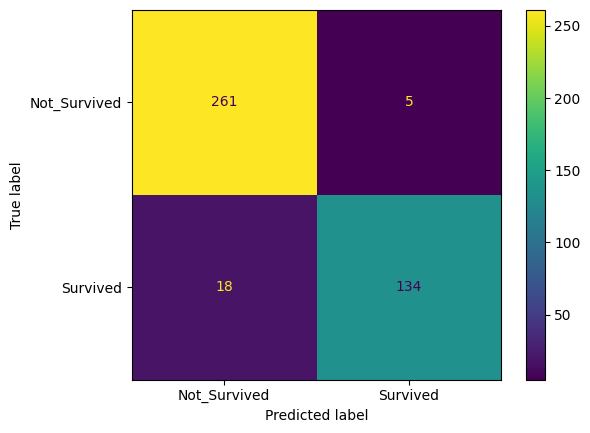

In [ ]:
matrixDT = confusion_matrix(actualdata['Survived'],predictions5)
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT,display_labels=['Not_Survived','Survived'])
matrixDT_display.plot()

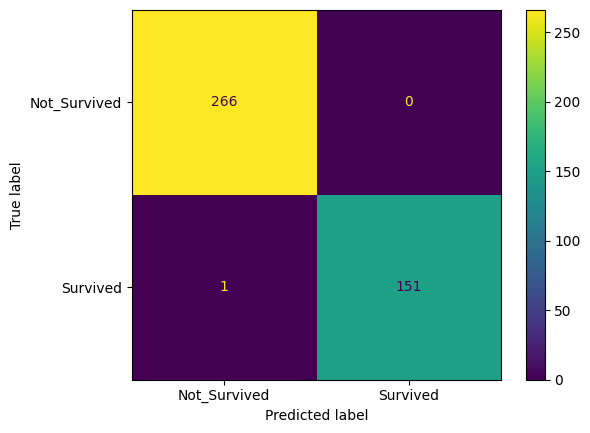

In [ ]:
matrixDT = confusion_matrix(actualdata['Survived'],predictions6)
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT,display_labels=['Not_Survived','Survived'])
matrixDT_display.plot()

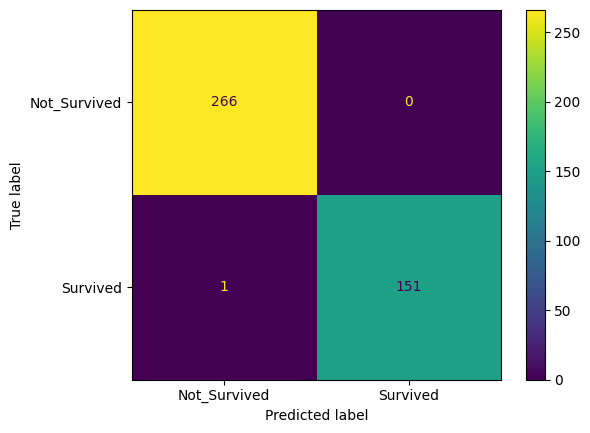

In [ ]:
matrixDT = confusion_matrix(actualdata['Survived'],predictions6)
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT,display_labels=['Not_Survived','Survived'])
matrixDT_display.plot()

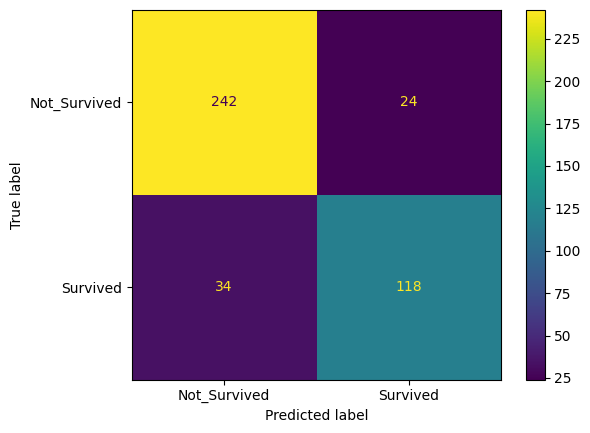

In [ ]:
matrixDT = confusion_matrix(actualdata['Survived'],predictions7)
matrixDT_display = ConfusionMatrixDisplay(confusion_matrix=matrixDT,display_labels=['Not_Survived','Survived'])
matrixDT_display.plot()

In [ ]:
actual_accuracy1=accuracy_score(predictions1, actualdata['Survived'])
actual_accuracy2=accuracy_score(predictions2, actualdata['Survived'])
actual_accuracy3=accuracy_score(predictions3, actualdata['Survived'])
actual_accuracy4=accuracy_score(predictions4, actualdata['Survived'])
actual_accuracy5=accuracy_score(predictions5, actualdata['Survived'])
actual_accuracy6=accuracy_score(predictions6, actualdata['Survived'])
actual_accuracy7=accuracy_score(predictions7, actualdata['Survived'])

In [ ]:
accuracy_dict = {'Decision tree':bscore1, '':bscore2, 'SVM':bscore3, 'MLP':bscore4, 'Random Forest':bscore5, 'Gradient Boosting Model':bscore6, 'KNN':bscore7}
print(accuracy_dict)


{'Decision tree': 0.7895215263210469, '': 0.7810508440715213, 'SVM': 0.7895215263210469, 'MLP': 0.7852662071721107, 'Random Forest': 0.7598641494356209, 'Gradient Boosting Model': 0.7867046249125962, 'KNN': 0.723064628908201}


In [ ]:
maxval = max(accuracy_dict, key= accuracy_dict.get)
print("Maximum Accuracy:",maxval,"=",accuracy_dict[maxval])

Maximum Accuracy: Decision tree = 0.7895215263210469


<BarContainer object of 7 artists>

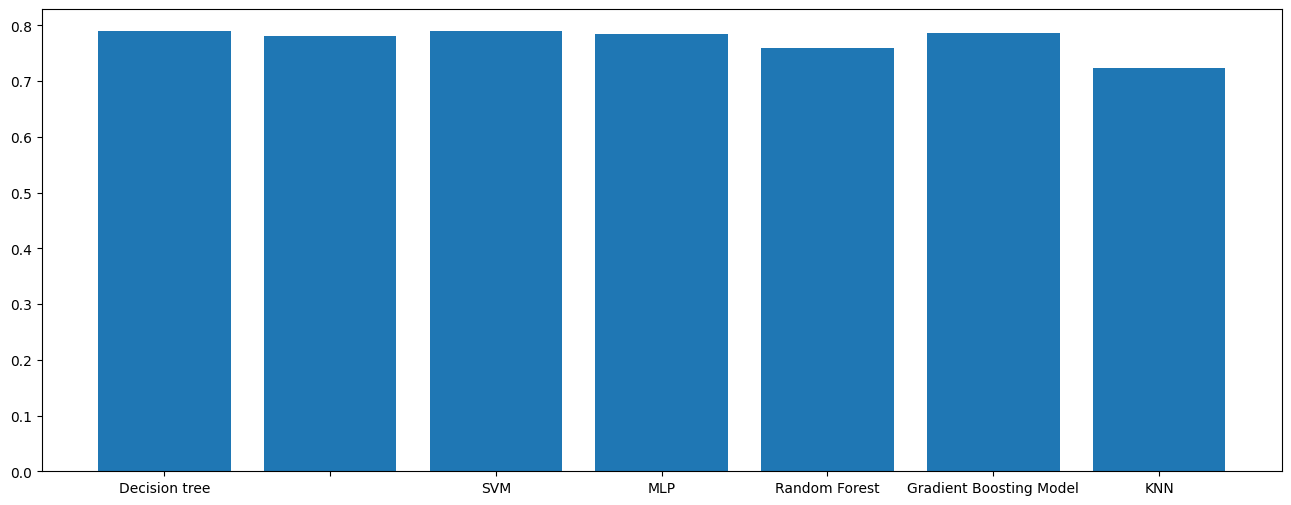

In [ ]:
accuracy_list = list(accuracy_dict.values())
accuracy_keys = list(accuracy_dict.keys())
matplotlib.pyplot.figure(figsize=(16,6))
matplotlib.pyplot.bar(range(len(accuracy_dict)), accuracy_list, tick_label = accuracy_keys, align='center')

In [ ]:
actual_accuracy_dict = {'Decision tree':actual_accuracy1, 'Naive bayes':actual_accuracy2, 'SVM':actual_accuracy3, 'MLP':actual_accuracy4, 'Random Forest':actual_accuracy5, 'Gradient Boosting Model':actual_accuracy6, 'KNN':actual_accuracy7}
print(actual_accuracy_dict)

{'Decision tree': 1.0, 'Naive bayes': 0.992822966507177, 'SVM': 1.0, 'MLP': 0.992822966507177, 'Random Forest': 0.9449760765550239, 'Gradient Boosting Model': 0.9976076555023924, 'KNN': 0.861244019138756}


In [ ]:
#Printing max actual data. I dont know how XGBRFC and BNB got this high accuracy.
actualmaxval = max(actual_accuracy_dict, key= actual_accuracy_dict.get)
print("Maximum Accuracy:",actualmaxval,"=",actual_accuracy_dict[actualmaxval])

Maximum Accuracy: Decision tree = 1.0


<BarContainer object of 7 artists>

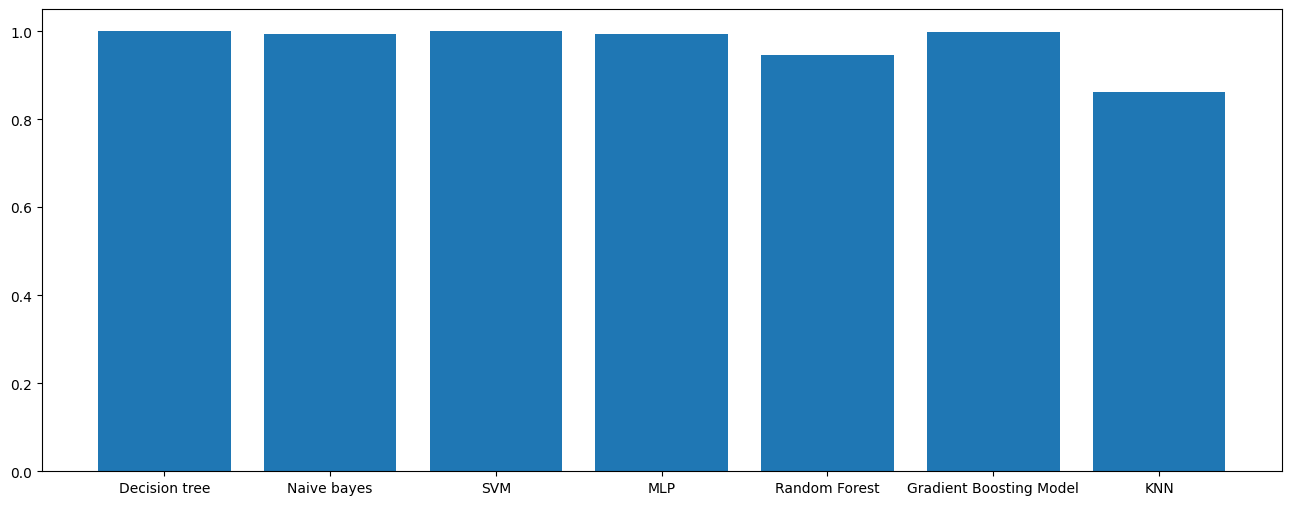

In [ ]:
actual_accuracy_list = list(actual_accuracy_dict.values())
actual_accuracy_keys = list(actual_accuracy_dict.keys())
matplotlib.pyplot.figure(figsize=(16,6))
matplotlib.pyplot.bar(range(len(actual_accuracy_dict)), actual_accuracy_list, tick_label = actual_accuracy_keys, align='center')


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd  # Import pandas with alias 'pd'

# Create the DataFrame
final_answer = pd.DataFrame()
final_answer['PassengerId'] = actualdata['PassengerId']
final_answer['Survived'] = predictions1  # 4th model is BNB which has the highest accuracy

# If you want to see the result
print(final_answer)

# If you want to save it to a CSV file
final_answer.to_csv('submission.csv', index=False)


     PassengerId  Survived
0            892       0.0
1            893       1.0
2            894       0.0
3            895       0.0
4            896       1.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       0.0

[418 rows x 2 columns]


In [ ]:
dfa=final_answer.to_csv('submission.csv', index=False)


In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_answer


,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [ ]:
print(final_answer.dtypes)

PassengerId      int64
Survived       float64
dtype: object


In [ ]:
final_answer['Survived'] = final_answer['Survived'].astype('int64')

# Print updated data types
print("\nUpdated dtypes:")
print(final_answer.dtypes)

# Print the updated DataFrame
print("\nUpdated DataFrame:")
print(final_answer)


Updated dtypes:
PassengerId    int64
Survived       int64
dtype: object

Updated DataFrame:
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
final_answer.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>